In [31]:
! pip install -q -r ../requirements.txt

In [1]:
from utils import *

# 1. Reading Data

## 1.1 Normalizing columns and information

In [2]:
df = pd.read_csv(os.path.join(bronze, 'bank-additional-full.csv'), sep=';')
df.columns = [normalizeString(colname) for colname in df.columns]
df = convert_target(df, target_col='y')

In [3]:
print("Dataframe shape:", df.shape)
pprint(("Columns:", df.columns.tolist()), compact=True)
print((df.info()))
print(df.shape)

Dataframe shape: (41188, 21)
('Columns:',
 ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
  'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous',
  'poutcome', 'emp_var_rate', 'cons_price_idx', 'cons_conf_idx', 'euribor3m',
  'nr_employed', 'y'])
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campai

## 1.2 Check for features without explanatory power, either by being all NaN or the same for all entries

In [4]:
columns_to_drop = [col for col in df.columns if df[col].nunique(dropna=True) == 1 or df[col].isna().all()]
print(columns_to_drop)

[]


In [5]:
print(f'Ammount of duplicate rows: {df.duplicated(keep=False).sum()}')
df.drop_duplicates(inplace=True)

Ammount of duplicate rows: 24


In [6]:
def checkSingleLabelBalance(df, label_col, threshold=None):

  print("----------------------------------------")
  print(f"Checking: {label_col}")

  counts = df[label_col].value_counts(dropna=False)

  print(counts)

  # Plot
  plt.figure(figsize=(6, 4))
  sns.countplot(data=df, x=label_col, hue=label_col, legend=False, stat='percent', palette='pastel')
  plt.title(f'{label_col} Distribution')
  plt.xlabel(label_col)
  plt.ylabel('Percentage of Patients')
  plt.grid(axis='y')
  plt.xticks(rotation=45)

  if threshold is not None:
    plt.axhline(y=threshold, color='r', linestyle='-', label='Inbalance Threshold')

  plt.legend()
  plt.legend(loc='lower center', bbox_to_anchor=(1, 0.5))
  plt.tight_layout()

  return plt.show()

In [7]:
# print categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
print("Categorical columns:", categorical_cols)

Categorical columns: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome']


<Figure size 300x300 with 0 Axes>

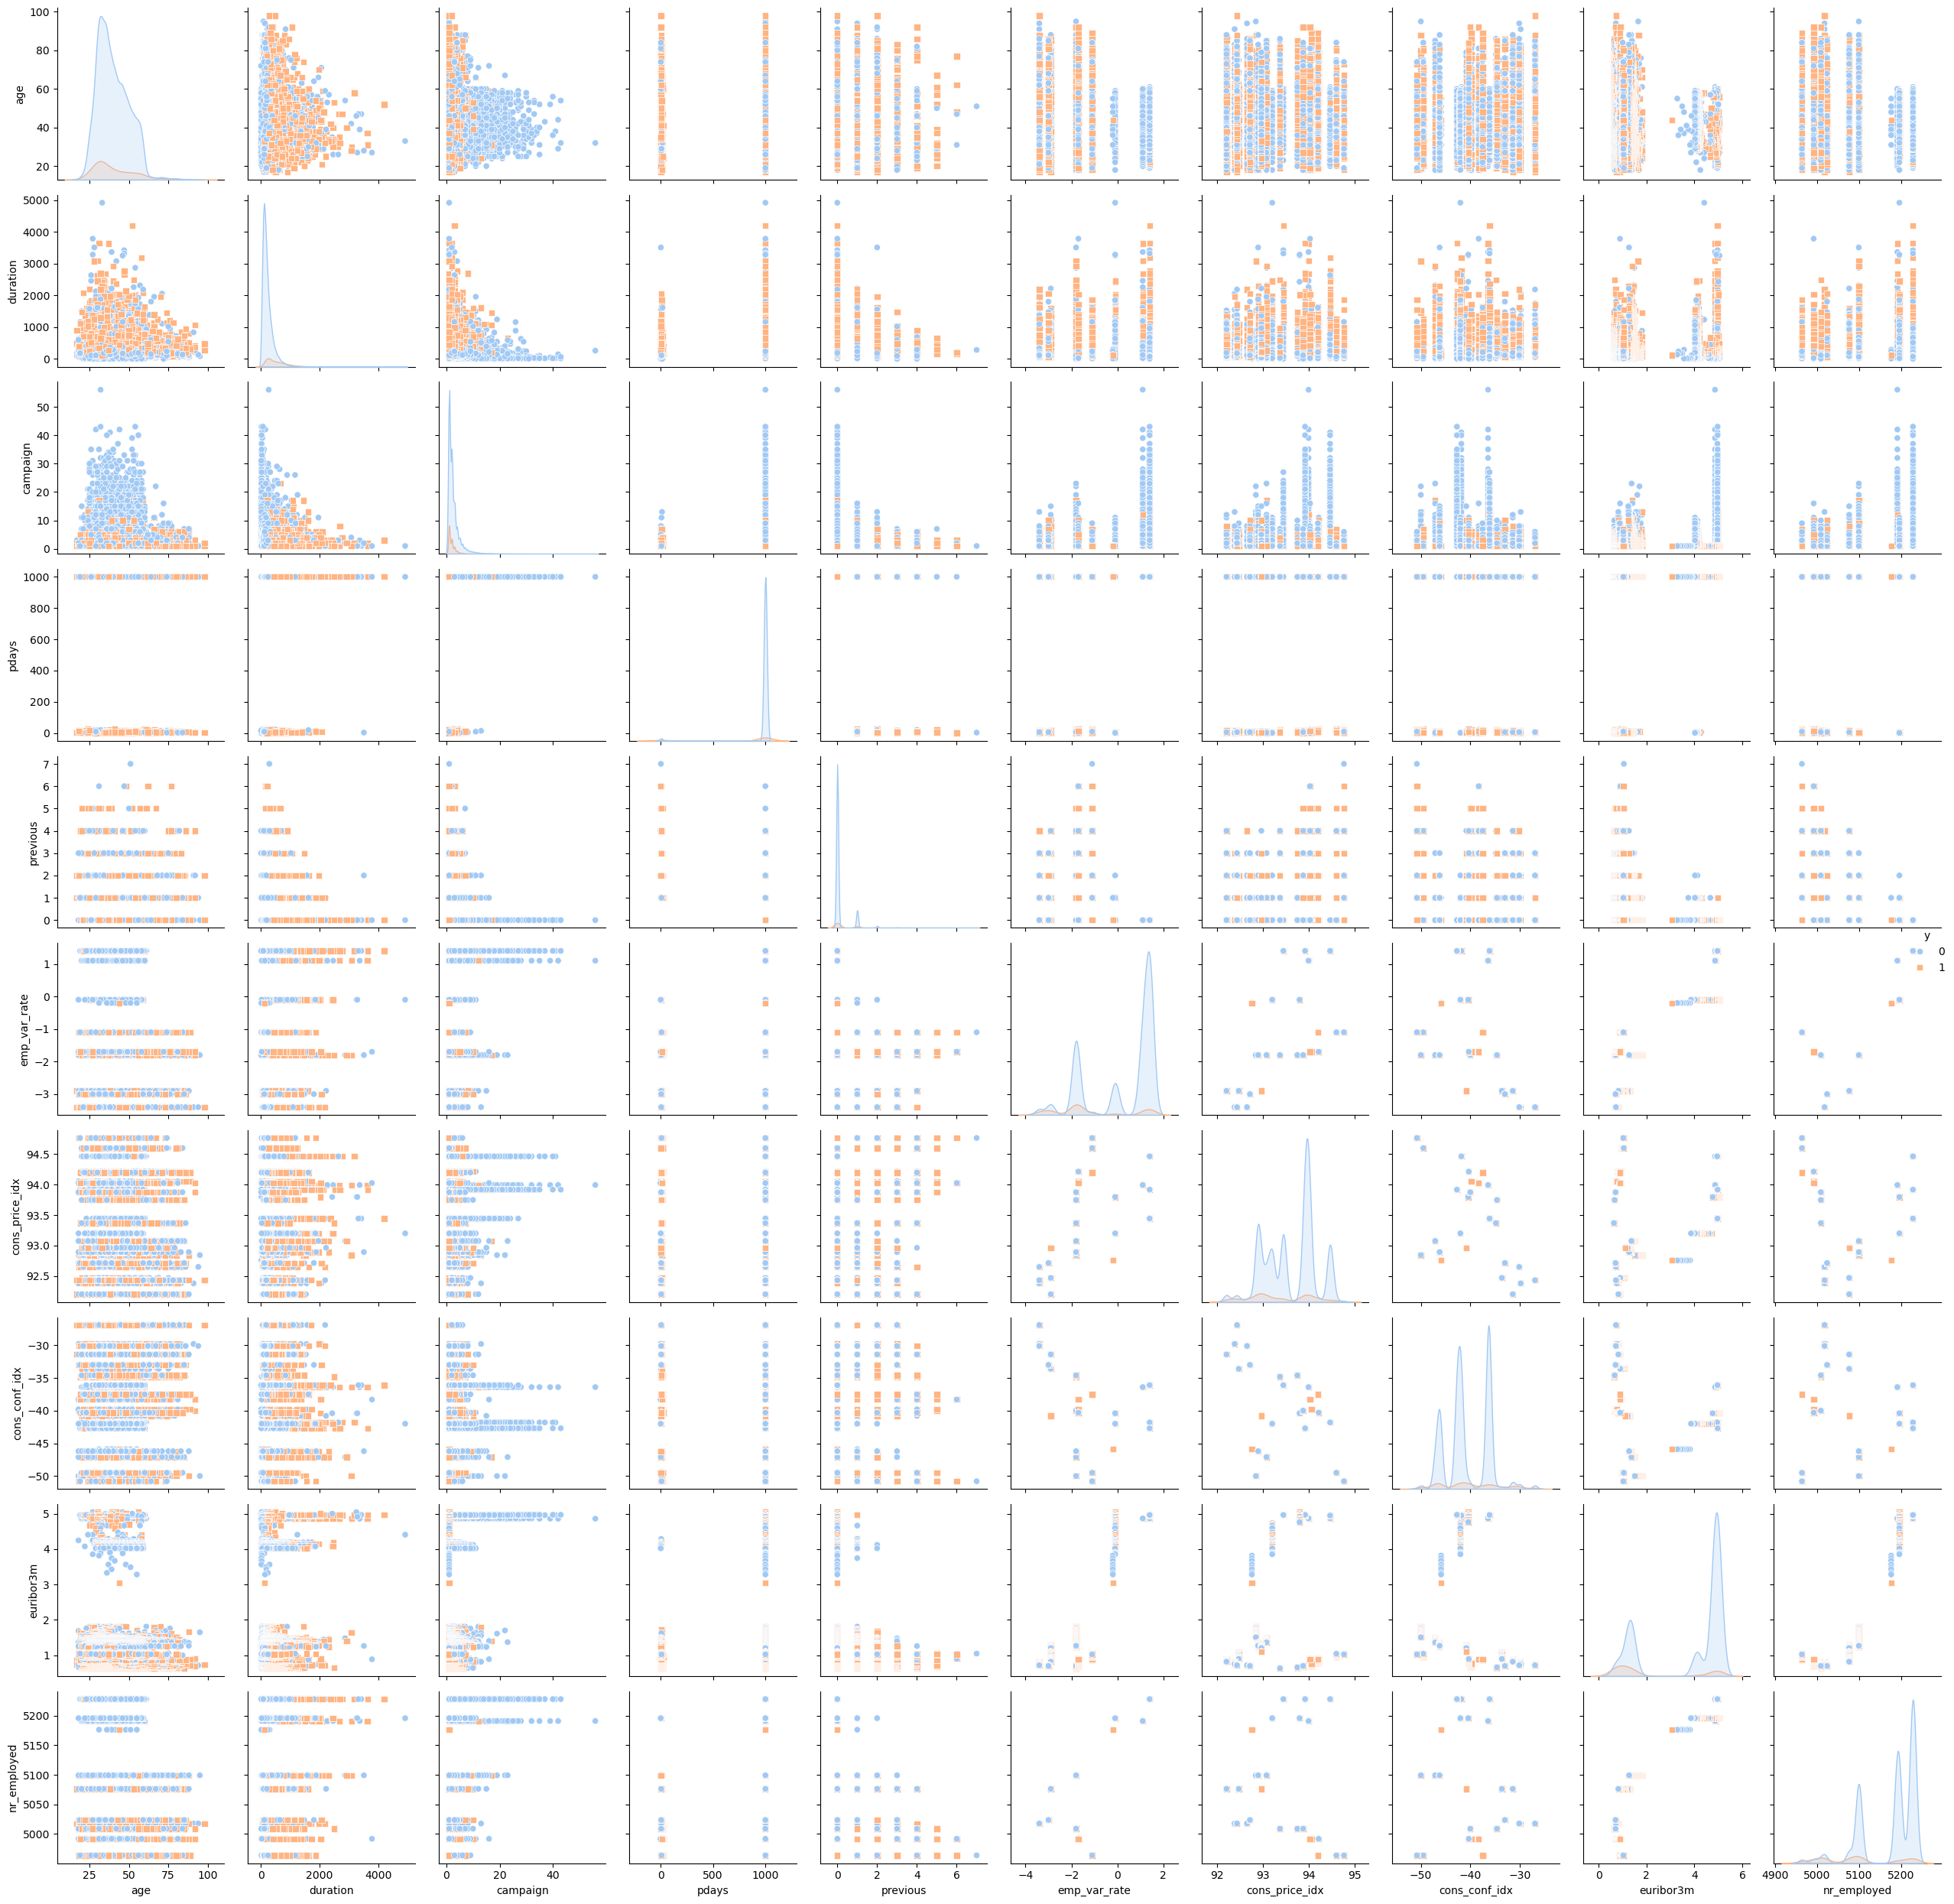

In [8]:
plt.figure(figsize=(3, 3))

sns.pairplot(df, hue='y', palette='pastel', diag_kind='kde', markers=['o', 's'])

plt.tight_layout()
plt.show()

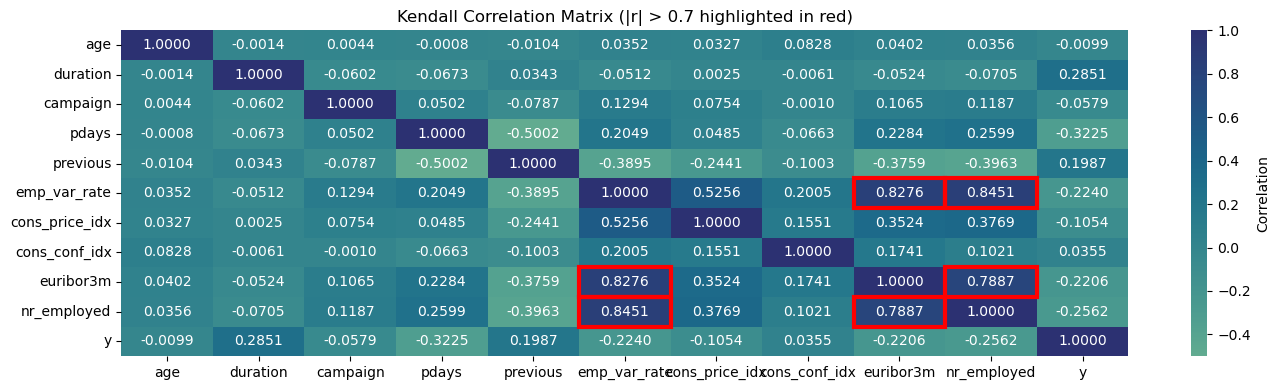

In [9]:
#highlighting correlations above 0.7

plt.figure(figsize=(14,4))
corr_matrix = df.select_dtypes(include=["number"]).corr('kendall')

# Create annotation with highlighting
annot = corr_matrix.map(lambda x: f'**{x:.4f}**' if abs(x) > 0.7 and abs(x) < 1 else f'{x:.4f}')

ax = sns.heatmap(corr_matrix, annot=True, cmap='crest', fmt=".4f", center=0, 
                 cbar_kws={'label': 'Correlation'})

# Highlight cells with correlation > 0.7
for i in range(len(corr_matrix)):
    for j in range(len(corr_matrix.columns)):
        if abs(corr_matrix.iloc[i, j]) > 0.7 and abs(corr_matrix.iloc[i, j]) < 1:
            ax.add_patch(plt.Rectangle((j, i), 1, 1, fill=False, edgecolor='red', lw=3))

plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.title('Kendall Correlation Matrix (|r| > 0.7 highlighted in red)')

plt.tight_layout()
plt.show()

In [22]:
# Save cleaned dataframe
df.to_csv(os.path.join(silver, 'base_dataset.csv'), index=False)